## Project 3 - Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [68]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [69]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [70]:
# this returns summary statistic of dataset.
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


b. Use the below cell to find the number of rows in the dataset.

In [71]:
print("This dataset contains {} rows.".format(int(df.shape[0])))

This dataset contains 294478 rows.


In [72]:
print("This testing period is between {} to {}.".format(df['timestamp'].min(), df['timestamp'].max()))

This testing period is between 2017-01-02 13:42:05.378582 to 2017-01-24 13:41:54.460509.


c. The number of unique users in the dataset.

In [73]:
print("The number of unique users in the dataset is {}.".format(int(df['user_id'].nunique())))

The number of unique users in the dataset is 290584.


d. The proportion of users converted.

In [74]:
# find proportion of user converted by manual calculation. 
# var "users_converted" => converted column = 1 ; "p1" => proportion of converted = 1.

users_converted=float(df.query('converted == 1')['user_id'].nunique())
total_users = float(df.shape[0])
p_converted = float(users_converted/total_users)

In [75]:
# find proportion of user converted
float(df['converted'].mean())

0.11965919355605512

In [76]:
print("Proportion of user converted (converted = 1) is {:.2%}.".format(p_converted))

Proportion of user converted (converted = 1) is 11.94%.


e. The number of times the `new_page` and `treatment` don't line up.

There are 2 different ways that new_page and treatment don't line up:
- Treatment group and not new_page
- Not Treatment group and new_page


In [77]:
#find data where treatment and new_page don't line up. 
df_dont_line_up= df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id']

In [78]:
print(" The number of times the new_page and treatment don't line up is {}.".format(int(df_dont_line_up.count())))

 The number of times the new_page and treatment don't line up is 3893.


f. Do any of the rows have missing values?

In [79]:
# Number of missing values in the dataset
pd.isnull(df).sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [80]:
print(" Any missing values in dataset ?  {}.".format(df.isnull().values.any()))

 Any missing values in dataset ?  False.


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [81]:
#Create new dataset contain data where treatment aligned with new_page only. 
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))]

In [82]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [83]:
df2.shape[0]

290585

In [84]:
df2['user_id'].nunique()
print("Number of unique user_ids :  {}".format(int(df2['user_id'].nunique())))

Number of unique user_ids :  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [85]:
# Number of duplicated values in the dataset
print("Number of duplicated user_id :  {}".format(sum(df2['user_id'].duplicated())))

Number of duplicated user_id :  1


In [86]:
#user_id repeated in df2 ; The user_id for the non-unique id in df2.
u1 = df2[df2.duplicated(['user_id'], keep=False)]['user_id']

In [87]:
print("The user_id for the non-unique id in df2 :  {}".format('773192'))

The user_id for the non-unique id in df2 :  773192


c. What is the row information for the repeat **user_id**? 

In [88]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [89]:
# Remove one of the duplicated user, after that the total row count should be 290584.
df2.drop_duplicates(subset='user_id', keep='first', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
# Now the total row count should be 290584.

df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [91]:
#Check total row
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [92]:
# find proportion of user converted. 
#"p" => proportion of converted = 1.

p=float(df.converted.sum() / df.converted.count())
p

0.11965919355605512

In [93]:
# find proportion of user converted.
p_converted = float(df2['converted'].mean())
print("The probability of an individual converting regardless of the page they receive is {0:.2%}".format(p_converted))

The probability of an individual converting regardless of the page they receive is 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [94]:
# find probability of users in control group converted. 
p_cntl_converted = float(df2.query('group == "control"')['converted'].mean())
print("The probability of an individual in control group who converted is {0:.2%}".format(p_cntl_converted))

The probability of an individual in control group who converted is 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [95]:
# find proportion of user in treatment group converted. 
p_tre_converted = float(df2.query('group == "treatment"')['converted'].mean())
print("The probability of an individual in treatment group who converted is {0:.2%}".format(p_tre_converted))

The probability of an individual in treatment group who converted is 11.88%


d. What is the probability that an individual received the new page?

In [96]:
# find proportion of user received new page. 
#p_user_receive_new = df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
p_user_receive_new = float(df2.query('landing_page == "new_page"').shape[0]/df2.shape[0])
print("The probability of an individual received new page is {0:.2%}".format(p_user_receive_new))

The probability of an individual received new page is 50.01%


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No, there is no obvious evidence that new page leads to more conversions and the probability that the individual received the new page is only 50.01%. And further more, the probablity users converted in both control and treatment group are pretty similar to each other.**


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Hypothesis Significance Testing

#### Null hypotesis : The new page is worse, or only as good, as the old ( what we assume to be true by default) .

**H0: p_old >= p_new**


#### Alternative hypotesis: The new page is better than the old (what we want to prove to be true).

**H1: p_old  < p_new**



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [97]:
p_new = p_converted
p_new

0.11959708724499628

In [98]:
print("The convert rate for Pnew under null is {}".format(p_new))

The convert rate for Pnew under null is 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [99]:
#p_old = df2.converted.mean()
p_old = p_converted
p_old

0.11959708724499628

In [100]:
print("The convert rate for Pold under null is {}".format(p_old))

The convert rate for Pold under null is 0.11959708724499628


c. What is $n_{new}$?

In [101]:
#Number of users who use new page.
n_new = int(df2.query("landing_page == 'new_page'").shape[0])
n_new

145310

d. What is $n_{old}$?

In [102]:
#Number of users who use old page.
n_old = int(df2.query('landing_page == "old_page"').shape[0])
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [103]:
#Simulate  n_new  transactions with a convert rate of  p_new  under the null
#new_page_converted1 = np.random.choice([0,1],n_new, p=(p_new,1-p_new))

# np.random.binomial(n, p, size)
# n=1 trial size, p=probabiity of trial, size=number of trials to run
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [104]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([1, 0, 0, ..., 0, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [105]:
#probablity of new page converted rate
npc = float(new_page_converted.mean())
npc

0.12055605257724863

In [106]:
#probablity of old page converted rate
opc = float(old_page_converted.mean())
opc

0.12037942095626196

In [107]:
#simulated diff
print("Value for P𝑛𝑒𝑤 - P𝑜𝑙𝑑 is {} ".format(npc-opc))

Value for P𝑛𝑒𝑤 - P𝑜𝑙𝑑 is 0.00017663162098667529 


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [108]:
#Simulate 10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑 values

p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    npc = new_page_converted.mean()
    opc = old_page_converted.mean()
    diff = npc - opc
    p_diffs.append(diff)


In [109]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

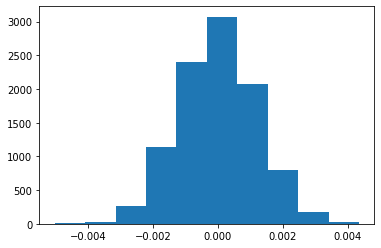

In [110]:
plt.hist(p_diffs);

**Yes, according to the Central Limit Theorem, with a large enough sample size, the sample mean follows a
normal distribution shape.**


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [111]:
#Compute observed difference in actual converted rate 
obs_diff = p_tre_converted - p_cntl_converted  
obs_diff

-0.0015782389853555567

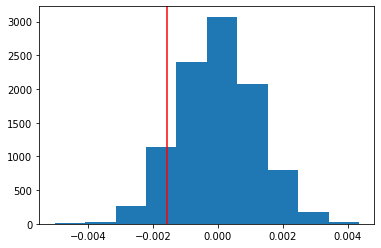

In [112]:
#Plot proportion of the p_diffs are greater than the actual difference observed 
plt.hist(p_diffs);
plt.axvline(obs_diff, color='red');


In [113]:
#Compute proportion of the p_diffs are greater than the actual difference observed in ab_data.csv

p_val = float((p_diffs > obs_diff).mean())
 
print("Proportion of p_diffs greater than actual difference observed: {}".format(p_val))

Proportion of p_diffs greater than actual difference observed: 0.9079


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value is called the p-value. It is the probability of observing the statistic (in this case is the conversion rate) or a more extreme in favor of the alternative given choosing the null hypothesis.**

I will compare p-value to a signifincance level named alpha to make conclusion about my hypothesis. 
Level of significance I selected is 5% or 0.05.

- If p-value <= 0.05   :  indicate a strong evidence to reject null hypothesis.
- If p-value > 0.05  : indicate a weak evidence to reject null hypothesis (fail to reject the null)


In [114]:
if p_val <= 0.05:
    print("Rejecting null hypothesis that old page is better than new page.")
else:
    print("Fail to reject null hypothesis that old page is better than new page.")

Fail to reject null hypothesis that old page is better than new page.


**In this case, the p-value is equal 0.9028. If the p-value is greater than alpha (0.05), it failed to reject the null hypothesis.
New landing page does not have a conversion proportion than old page on statistically significant basis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [115]:
# Number of users with all new_page users and all new_page users

n_converted_new = int(df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique())
n_converted_old = int(df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique())

n_converted_old, n_converted_new

(17489, 17264)

In [116]:
# Number of users who use old page and new page.

n_old , n_new

(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [117]:
# calculate z-stat
p1 = n_converted_new / n_new
p2 = n_converted_old / n_old
p = (n_converted_new + n_converted_old) / (n_new + n_old)
z = float((p2 - p1) / np.sqrt(p*(1-p)*((1/n_old)+(1/n_new))))
z

1.3109241984234394

In [118]:
import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([n_converted_old, n_converted_new], [n_old, n_new], alternative ='smaller')

z_score, p_value

(1.3109241984234394, 0.9050583127590245)

In [119]:
from scipy.stats import norm

# for our single-sides test, assumed at 95% confidence level, we calculate: 
value = .05
critical_area=norm.ppf(1-value)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [120]:
if z_score > critical_area:
    print("Rejecting null hypothesis that old page is better than new page.")
else:
    print("Fail to reject null hypothesis that old page is better than new page.")

Fail to reject null hypothesis that old page is better than new page.


**- z-score** 
   - z-score means that the difference between our test statistic (the difference between conversion rates) and the null mean.
   - z_score is a measure of how many standard deviations below or above the population mean.
   - The computed z-score here  is 1.31.    
   - This is less than the critical value which is 1.64, therefore we fail to reject the null hypothesis.

**- p-value**
   - p-value here is 0.905, which is bigger than alpha of 0.05. 
   - in part j, the p-value almost similar which is 0.9028

**So the test appears to agree with the previous findings that converstions from the new page does not have a higher conversion rate than old page statistically.**


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?


**Regression Types/ Models:**
- Simple Linear (SLR): compare 2 quantitative variables - use one explanatory variable (x) to predict a
response variable (y)
- Multiple Linear (MLR): compare multiple explanatory variables (X) to predict a response variable (y)
(predicted response not constrained, any value between negative and positive infinity)
- Logistic: predict categorical data with only 2 outcomes (predicts a probability between 0 and 1)


**In this case, Logistic regression is suitable to be used to predict 1 and 0 outcomes.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [121]:
# create ab_page column, which is 1 when an individual receives the treatment and 0 if control
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
#create a colun for the intercept
df2['intercept'] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [124]:
#Create Logit regression model for conveted variable and  ab_page, and us control as baseline
import statsmodels.api as sm
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [125]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        15:07:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**P-value here is 0.19, it is larger than 0.05,  which means 'ab_page' is not significant in prediction and we cannot reject H0.**

**These p-values differ from Part II because in the A/B test our null hypothesis states that the old page is better
than, or equal to, the new (a one-tailed test). Regression is a two-tailed test therefore p-values have a different
meaning relating to slope.**



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Considering other factors to be added into regression model will make better predictions. .**

**Disadvantages: landing_page is categorical variable that should be applied in dummy variable, can't be added into regression model directly.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [126]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [127]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [128]:
# review country column data, how many unique entries are there?
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [129]:
### Create the necessary dummy variables
df_new[['CA', 'US', 'UK']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,US,UK
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [130]:
# drop US (now baseline)
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        15:07:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
UK            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

Observation: 

All the p-values above are > 5.  Not likely that country has no significant impact on conversion.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [131]:
df_new['UK_new_page'] = df_new['UK']*df_new['ab_page']
df_new['CA_new_page'] = df_new['CA']*df_new['ab_page']
df_new.head()


,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,US,UK,UK_new_page,CA_new_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0


In [132]:
# drop US (now baseline)
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA_new_page', 'UK_new_page']])
results = logit_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:               3.272e-05
Time:                        15:08:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.03077
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9873      0.007   -275.573      0.000      -2.001      -1.973
CA_new_page    -0.0842      0.038     -2.225      0.026      -0.158      -0.010
UK_new_page    -0.0197      0.012     -1.634      0.102      -0.043       0.004
===============================================================================
"""

Observation: 

Based on the above, one p-value does present as statistically significant: the interaction of CA and ab_page (p = 0.026; p < 0.05).

### Conclusion
From the different testings, I failed to reject Null Hypothesis as there is no significant difference in conversion rates. 
Thus, old page is still better than new page and should be retained.

However, these results are determined based on given dataset. There may be limitations due to incorrect data or missing columns etc. Consider timestamp as another factors, there may be a different conclusion.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.